In [57]:
import pandas as pd

In [58]:
df = pd.read_csv("LookTwice - Inventario - Labels.csv")

In [59]:
df.head()

,SKUS TO SELL,PRECIO,NOMBRE,QR CODE,BARCODE
0,ACR007,$39.200,Top Azul Oscuro Tribal,Cargando...,https://looktwice.co/collections/Superior/prod...
1,ACR008,$39.200,Top Blanco Tiras,Cargando...,https://looktwice.co/collections/Superior/prod...
2,SJ034,$200.000,Botas Peludas Grises,Cargando...,https://looktwice.co/collections/Zapatos/produ...
3,IR089,$240.500,High Top Sneakers,Cargando...,https://looktwice.co/collections/Zapatos/produ...
4,CAC001,$650.592,Tennis Estrellas Doradas,Cargando...,https://looktwice.co/collections/Zapatos/produ...


In [60]:
from PIL import Image, ImageDraw, ImageFont
import qrcode
from barcode import generate
from barcode.writer import ImageWriter
import os

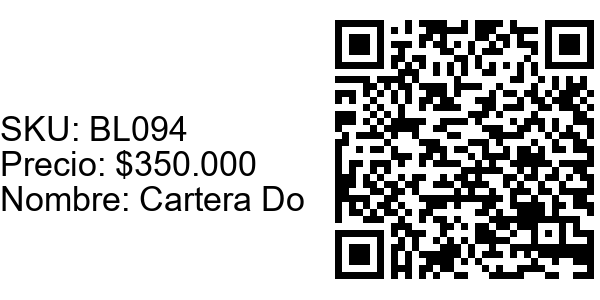

In [61]:
width, height = 600, 300

# Iterar a través de las filas del DataFrame
for index, row in df[1:7].iterrows():
    # Crear una imagen en blanco
    image = Image.new('RGB', (width, height), color='white')
    draw = ImageDraw.Draw(image)

    # Ajustar el tamaño de fuente
    font = ImageFont.truetype("arial.ttf", 34)

    # Agregar información (SKU, precio, nombre) al lado izquierdo
    info_text = f"SKU: {row['SKUS TO SELL']}\nPrecio: {row['PRECIO']}\nNombre: {row['NOMBRE'][:10]}"
    draw.text((0, 110), info_text, fill='black', font=font)

    # Generar un código QR con el valor deseado (por ejemplo, la URL del producto)
    qr = qrcode.QRCode(version=1, error_correction=qrcode.constants.ERROR_CORRECT_L, box_size=7, border=0)
    qr.add_data(row['BARCODE'])  # Reemplaza 'URL' con la columna que contiene las URLs
    qr.make(fit=True)
    qr_image = qr.make_image(fill_color='black', back_color='white')

    # Pegar el código QR en el lado derecho
    image.paste(qr_image, (width - 265, 20))

    # Guardar la imagen con un nombre único (por ejemplo, SKU.png)
    image.save(f"{row['SKUS TO SELL']}.jpg")
image
#print("Imágenes guardadas en la carpeta:")

In [63]:
from reportlab.pdfgen import canvas
from PIL import Image, ImageDraw, ImageFont
import qrcode
import pandas as pd

# Your existing code...

# Create the output directory for PDF files
output_directory = "pdf_output"

# Create the output directory if it doesn't exist
import os
os.makedirs(output_directory, exist_ok=True)

# Set the width and height for the PDF pages
pdf_width, pdf_height = 600, 300

# Create a PDF file to concatenate all images
pdf_filename_all = os.path.join(output_directory, "all_images.pdf")
c_all = canvas.Canvas(pdf_filename_all, pagesize=(pdf_width, pdf_height))

# Iterar a través de las filas del DataFrame
for index, row in df[1:7].iterrows():
    # Your existing code to create images...
    width, height = 600, 300

    # Crear una imagen en blanco
    image = Image.new('RGB', (width, height), color='white')
    draw = ImageDraw.Draw(image)

    # Ajustar el tamaño de fuente
    font = ImageFont.truetype("arial.ttf", 34)

    # Agregar información (SKU, precio, nombre) al lado izquierdo
    info_text = f"SKU: {row['SKUS TO SELL']}\nPrecio: {row['PRECIO']}\nNombre: {row['NOMBRE'][:10]}"
    draw.text((0, 90), info_text, fill='black', font=font)

    # Generar un código QR con el valor deseado (por ejemplo, la URL del producto)
    qr = qrcode.QRCode(version=1, error_correction=qrcode.constants.ERROR_CORRECT_L, box_size=7, border=0)
    qr.add_data(row['BARCODE'])  # Reemplaza 'URL' con la columna que contiene las URLs
    qr.make(fit=True)
    qr_image = qr.make_image(fill_color='black', back_color='white')

    # Pegar el código QR en el lado derecho
    image.paste(qr_image, (width - 265, 20))

    # Guardar la imagen con un nombre único (por ejemplo, SKU.png)
    image_filename = f"{row['SKUS TO SELL']}.jpg"
    image.save(image_filename)

    # Draw the image on the all_images.pdf
    c_all.drawImage(image_filename, 0, 0, width=pdf_width, height=pdf_height)
    c_all.showPage()  # Add a new page for each image
    
    # Optionally, you can remove the temporary image file
    if os.path.exists(image_filename):
        os.remove(image_filename)

# Save the concatenated PDF file
c_all.save()

# Print a message indicating the PDF file is saved
print(f"PDF file saved as '{pdf_filename_all}'.")


PDF file saved as 'pdf_output\all_images.pdf'.
